<a href="https://colab.research.google.com/github/solomonpromise/solo/blob/master/Auto_Insurance_Project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline

## Read files

In [ ]:
# Load files into a pandas dataframe
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
sample_sub = pd.read_csv("SampleSubmission.csv")
variable = pd.read_csv("VariableDefinitions.csv")

In [ ]:
variable

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [ ]:
sample_sub

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0
...,...,...
1197,ID_ZTTHC5X,0
1198,ID_ZUJAFUP,0
1199,ID_ZWHCTUM,0
1200,ID_ZWQRL8L,0


## Data Inspection/EDA on the train dataset

In [ ]:
#previewing the training data set
train_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [ ]:
#checking in the shape
train_df.shape

(12079, 14)

In [ ]:
#checking the information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [ ]:
#checking for missing value
train_df.isna().mean()*100

ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
dtype: float64

In [ ]:
#checking the descriptive statistics of the trai#checking the descriptive statistics of the train dataset
train_df.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


## Data Inspection/EDA on the test dataset

In [ ]:
# previewing the test dataset
test_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [ ]:
#checking the shape of the test dataset
test_df.shape

(1202, 13)

In [ ]:
#checking the information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      1202 non-null   object
 1   Policy Start Date       1202 non-null   object
 2   Policy End Date         1202 non-null   object
 3   Gender                  1161 non-null   object
 4   Age                     1202 non-null   int64 
 5   First Transaction Date  1202 non-null   object
 6   No_Pol                  1202 non-null   int64 
 7   Car_Category            830 non-null    object
 8   Subject_Car_Colour      505 non-null    object
 9   Subject_Car_Make        954 non-null    object
 10  LGA_Name                546 non-null    object
 11  State                   546 non-null    object
 12  ProductName             1202 non-null   object
dtypes: int64(2), object(11)
memory usage: 122.2+ KB


In [ ]:
#checking for missing values
test_df.isna().mean()

ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.034110
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
Car_Category              0.309484
Subject_Car_Colour        0.579867
Subject_Car_Make          0.206323
LGA_Name                  0.545757
State                     0.545757
ProductName               0.000000
dtype: float64

In [ ]:
#checking the descriptive statistics of the test dataset
test_df.describe()

,Age,No_Pol
count,1202.000000,1202.000000
mean,43.792845,1.257903
std,19.986245,0.613510
min,-26.000000,1.000000
25%,35.000000,1.000000
50%,41.000000,1.000000
75%,50.000000,1.000000
max,120.000000,7.000000


## Concatinating the train and test dataset for easy preprocessing

In [ ]:
# Combine train and test set
ntrain_df = train_df.shape[0] # to be used to split train and test set from the combined dataframe

all_data_df = pd.concat((train_df, test_df)).reset_index(drop=True)

In [ ]:
#previewing the combined dataset
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [ ]:
all_data_df.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
13276,ID_ZTTHC5X,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN
13277,ID_ZUJAFUP,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,NaN
13278,ID_ZWHCTUM,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,NaN
13279,ID_ZWQRL8L,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,NaN
13280,ID_ZWZ92GU,2010-03-18,2011-03-17,Male,28,2010-03-18,1,Saloon,Silver,TOYOTA,NaN,NaN,Car Classic,NaN


In [ ]:
all_data_df.shape

(13281, 14)

In [ ]:
#checking the information off the combined dataset
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
dtypes: float64(1), int64(2), object(11)
me

In [ ]:
#checking for missing values
all_data_df.isna().mean()*100

ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.011821
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946465
Subject_Car_Colour        57.668850
Subject_Car_Make          20.510504
LGA_Name                  53.700776
State                     53.791130
ProductName                0.000000
target                     9.050523
dtype: float64

In [ ]:
#checking the descriptive statistics of the combined dataset
all_data_df.describe()

,Age,No_Pol,target
count,13281.000000,13281.000000,12079.000000
mean,42.375574,1.302763,0.120457
std,93.170951,0.723195,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


### Converting each column to its appriopriate datatype

In [ ]:
all_data_df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [ ]:
#converting date columnsto date data type.
all_data_df["Policy Start Date"] = pd.to_datetime(all_data_df["Policy Start Date"])
all_data_df["Policy End Date"] = pd.to_datetime(all_data_df["Policy End Date"])
all_data_df["First Transaction Date"] = pd.to_datetime(all_data_df["First Transaction Date"])

In [ ]:
#converting categorical columns to categorical data type.
all_data_df[["Gender", "Car_Category", "Subject_Car_Colour", "Subject_Car_Make", "LGA_Name", "State", "ProductName"]] = all_data_df[["Gender", "Car_Category", "Subject_Car_Colour", "Subject_Car_Make", "LGA_Name", "State", "ProductName"]].astype('category')

In [ ]:
#confirming the change.
all_data_df.info()

#Boom, the columns has been changed to there appropriaate data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  12881 non-null  category      
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            9171 non-null   category      
 8   Subject_Car_Colour      5622 non-null   category      
 9   Subject_Car_Make        10557 non-null  category      
 10  LGA_Name                6149 non-null   category      
 11  State                   6137 non-null   category      
 12  ProductName             13281 non-null  catego

## Data preprocessing and data wrangling

### Preprocessing each categorical & the Age column

In [ ]:
#checking for unique entries in the 'Gender' column
all_data_df["Gender"].unique()

#This column has some inconsistent values

[Male, Female, Entity, Joint Gender, NaN, NO GENDER, NOT STATED, SEX]
Categories (7, object): [Male, Female, Entity, Joint Gender, NO GENDER, NOT STATED, SEX]

In [ ]:
#checking for unique entries in the 'Age' column
all_data_df["Age"].unique()

#This column has some inconsistent values

array([   30,    79,    43,     2,    20,    37,    40,    71,    58,
          45,    51,   120,    38,    81,    69,    31,    70,    34,
           1,    41,    47,    36,    46,    48,    39,    63,    42,
          27,    64,    50,    53,    33,    23,    32,    59,    60,
          52,    54,    44,    11,    78,    28,    29,    57,    12,
          65,    35,    73,    56,    55,    26,    49,    18,    14,
          62,    25,    61,    72,    82,    67,     7,    10,    68,
          21,    76,    24,    66,     3,    93,    22,    77,    19,
          80,     9,     6,   -76,    -2,    89,    74,    75,    84,
          16,    90,   140,     8,     5,    13,    86,    15,   320,
         -12,    83,    85, -6099, -5939,     4,   -22,   144,   112,
          17,     0,    88,   -27,    87,   133,   102,   -51,   128,
         -26,   100], dtype=int64)

In [ ]:
#checking for unique entries in the 'Car_Category' column
all_data_df['Car_Category'].unique()

#This column has some inconsistent values

[Saloon, JEEP, NaN, Motorcycle, Truck, ..., Wagon, Shape Of Vehicle Chasis, Sedan, Station 4 Wheel, Tipper Truck]
Length: 17
Categories (16, object): [Saloon, JEEP, Motorcycle, Truck, ..., Shape Of Vehicle Chasis, Sedan, Station 4 Wheel, Tipper Truck]

In [ ]:
#checking for unique entries in the 'Subject_Car_Colour' column
all_data_df['Subject_Car_Colour'].unique()

[Black, Grey, Red, NaN, As Attached, ..., Yellow & White, Beige Mitalic, Light Gray, Blue Sky, Red Maroon]
Length: 47
Categories (46, object): [Black, Grey, Red, As Attached, ..., Beige Mitalic, Light Gray, Blue Sky, Red Maroon]

In [ ]:
#checking for unique entries in the 'Subject_Car_Make' column
all_data_df['Subject_Car_Make'].unique()

[TOYOTA, NaN, REXTON, Lexus, Hyundai, ..., BRILLIANCE, Buik, COMMANDER, Bajaj, Datsun]
Length: 76
Categories (75, object): [TOYOTA, REXTON, Lexus, Hyundai, ..., Buik, COMMANDER, Bajaj, Datsun]

In [ ]:
#checking for unique entries in the 'LGA_Name' column
all_data_df['LGA_Name'].unique()

[NaN, Lagos, Ikeja, Badagry, Eti-Osa, ..., Hong, Ifako-Agege, Benue, Okpokwu, Ngor-Okpala]
Length: 271
Categories (270, object): [Lagos, Ikeja, Badagry, Eti-Osa, ..., Ifako-Agege, Benue, Okpokwu, Ngor-Okpala]

In [ ]:
#checking for unique entries in the 'State' column
all_data_df['State'].unique()

#This column has some inconsistent values

[NaN, Lagos, Benue, Eti-Osa, Delta, ..., ENUGU-SOUTH, Ijebu-North, Asari-Toru, Idemili-south, Ngor-Okpala]
Length: 114
Categories (113, object): [Lagos, Benue, Eti-Osa, Delta, ..., Ijebu-North, Asari-Toru, Idemili-south, Ngor-Okpala]

In [ ]:
#checking for unique entries in the 'ProductName' column
all_data_df['ProductName'].unique()

[Car Classic, CarSafe, Muuve, CVTP, Car Plus, Motor Cycle, Customized Motor, CarFlex, Car Vintage]
Categories (9, object): [Car Classic, CarSafe, Muuve, CVTP, ..., Motor Cycle, Customized Motor, CarFlex, Car Vintage]

### Replacing inconsistent values in the "Gender", "Car_Category", "Subject_Car_Colour" & "State"

In [ ]:
#replacing other unqiue values other than Male and female to others
all_data_df["Gender"].replace({"Entity":"Others", "Joint Gender":"Others", "NO GENDER":"Others", "NOT STATED":"Others", "SEX":"Others"}, inplace = True)

In [ ]:
#replacing the inconsistent values other than Male and female to others
all_data_df['Car_Category'].replace({'Shape Of Vehicle Chasis':np.nan, 'Station 4 Wheel':np.nan}, inplace = True)

In [ ]:
all_data_df["Subject_Car_Colour"].replace("As Attached",np.nan, inplace = True)

In [ ]:
all_data_df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

### Checking the columns "Gender", "Car_Category", "Subject_Car_Colour" & "State" after replacing the inconsistent values.

In [ ]:
all_data_df["Gender"].unique()

array(['Male', 'Female', 'Others', nan], dtype=object)

In [ ]:
all_data_df["Car_Category"].unique()

array(['Saloon', 'JEEP', nan, 'Motorcycle', 'Truck', 'Bus', 'Mini Bus',
       'Pick Up', 'Mini Van', 'Van', 'Pick Up > 3 Tons', 'CAMRY CAR HIRE',
       'Wagon', 'Sedan', 'Tipper Truck'], dtype=object)

In [ ]:
all_data_df["Subject_Car_Colour"].unique()

[Black, Grey, Red, NaN, Blue, ..., Yellow & White, Beige Mitalic, Light Gray, Blue Sky, Red Maroon]
Length: 46
Categories (45, object): [Black, Grey, Red, Blue, ..., Beige Mitalic, Light Gray, Blue Sky, Red Maroon]

In [ ]:
all_data_df["State"].unique()

[NaN, Lagos, Benue, Eti-Osa, Delta, ..., ENUGU-SOUTH, Ijebu-North, Asari-Toru, Idemili-south, Ngor-Okpala]
Length: 114
Categories (113, object): [Lagos, Benue, Eti-Osa, Delta, ..., Ijebu-North, Asari-Toru, Idemili-south, Ngor-Okpala]

In [ ]:
all_data_df["State"].value_counts()

Lagos              3494
Benue               693
Abuja-Municipal     257
Eti-Osa             241
Ibeju-Lekki         129
                   ... 
Nasarawa              1
Ndokwa-East           1
Bayelsa               1
Bauchi                1
Ilesha-East           1
Name: State, Length: 113, dtype: int64

#### Dealing with outliers in Age Column

In [ ]:
plt.rcParams['figure.figsize'] = [8,14]
sns.set_style('darkgrid')

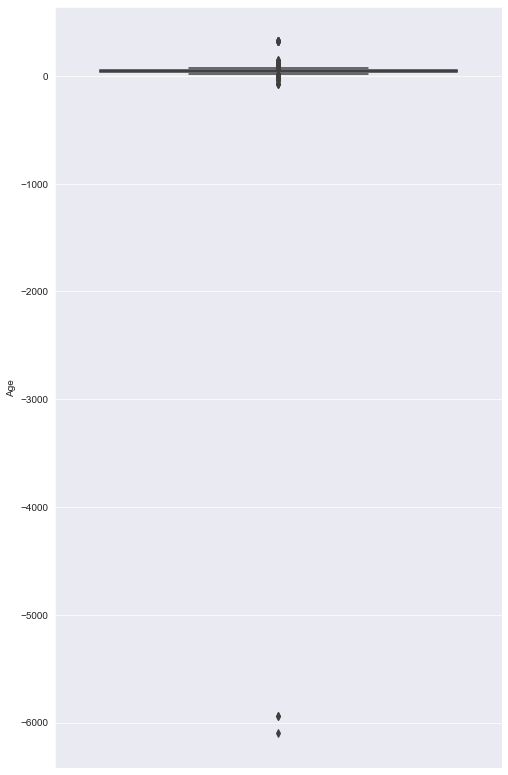

In [ ]:
sns.boxplot( y='Age', data=all_data_df)

In [ ]:
#defing a code to convert outliers to 'np.nan'
for x in ['Age']:
    q75,q25 = np.percentile(all_data_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    all_data_df.loc[all_data_df[x] < min,x] = np.nan
    all_data_df.loc[all_data_df[x] > max,x] = np.nan


In [ ]:
#confirming that the outliers has been removed from the 'Age' Column
all_data_df["Age"].unique()

array([30., nan, 43., 20., 37., 40., 71., 58., 45., 51., 38., 69., 31.,
       70., 34., 41., 47., 36., 46., 48., 39., 63., 42., 27., 64., 50.,
       53., 33., 23., 32., 59., 60., 52., 54., 44., 28., 29., 57., 65.,
       35., 56., 55., 26., 49., 18., 14., 62., 25., 61., 72., 67., 68.,
       21., 24., 66., 22., 19., 16., 13., 15., 17.])

#### Dealing with missing values

In [ ]:
#checking for the presence of missing values in the dataset
all_data_df.isna().mean()*100

ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.011821
Age                        9.758301
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.036820
Subject_Car_Colour        61.847752
Subject_Car_Make          20.510504
LGA_Name                  53.700776
State                     53.791130
ProductName                0.000000
target                     9.050523
dtype: float64

In [ ]:
# dealing with missing values in the 'Age' column
all_data_df['Age'] = all_data_df.Age.fillna(42)

In [ ]:
#confirming to see if the mean was afected after filling the missing values.
all_data_df['Age'].describe()

count    13281.000000
mean        42.033431
std         10.024327
min         13.000000
25%         36.000000
50%         42.000000
75%         47.000000
max         72.000000
Name: Age, dtype: float64

In [ ]:
# Age column
all_data_df['Age'] = all_data_df.Age.fillna(42)

In [ ]:
#Filling the 'Gender' column with the mode strategy
all_data_df['Gender'] = all_data_df['Gender'].fillna(all_data_df['Gender'].mode()[0])

#Filling the 'Car_Category' column with the mode strategy 
all_data_df['Car_Category'] = all_data_df['Car_Category'].fillna(all_data_df['Car_Category'].mode()[0])

#Subject_Car_Colour column
all_data_df['Subject_Car_Colour'] = all_data_df['Subject_Car_Colour'].fillna(all_data_df['Subject_Car_Colour'].mode()[0])

#Subject_Car_Make column
all_data_df['Subject_Car_Make'] = all_data_df['Subject_Car_Make'].fillna(all_data_df['Subject_Car_Make'].mode()[0])

#LGA_Name column
all_data_df['LGA_Name'] = all_data_df['LGA_Name'].fillna(all_data_df['LGA_Name'].mode()[0])

#Subject_Car_Make column
all_data_df['State'] = all_data_df['State'].fillna(all_data_df['State'].mode()[0])

In [ ]:
#confirming if the missing values has been removed.
all_data_df.isna().mean()*100

ID                        0.000000
Policy Start Date         0.000000
Policy End Date           0.000000
Gender                    0.000000
Age                       0.000000
First Transaction Date    0.000000
No_Pol                    0.000000
Car_Category              0.000000
Subject_Car_Colour        0.000000
Subject_Car_Make          0.000000
LGA_Name                  0.000000
State                     0.000000
ProductName               0.000000
target                    9.050523
dtype: float64

In [ ]:
#converting the "Age" column data type to integer. 
all_data_df["Age"] = all_data_df["Age"].astype(int)

#### Feature Engineering

In [ ]:
#creating a new column that shows the duration of the policy
all_data_df["Policy Duration"] = all_data_df["Policy End Date"] - all_data_df["Policy Start Date"]

In [ ]:
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Duration
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0.0,364 days
1,ID_0046BNK,2010-11-29,2011-11-28,Female,42,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1.0,364 days
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0.0,364 days
3,ID_0079OHW,2010-08-21,2011-08-20,Male,42,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0.0,364 days
4,ID_00BRP63,2010-08-29,2010-12-31,Others,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1.0,124 days


In [ ]:
#Converting the datatype of the 'Policy Duration' column to string so as to removed 'days' from the 'Policy Duration'
all_data_df['Policy Duration']=all_data_df['Policy Duration'].astype(str)

In [ ]:
#Removing the 'days' from the "Policy Duration"
all_data_df["Policy Duration"] = all_data_df["Policy Duration"].str.extract("(\d*\.?\d+)", expand=True)

In [ ]:
#Confirming that 'days' has been removed from the 'Policy Duration'
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Duration
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0.0,364
1,ID_0046BNK,2010-11-29,2011-11-28,Female,42,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1.0,364
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0.0,364
3,ID_0079OHW,2010-08-21,2011-08-20,Male,42,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0.0,364
4,ID_00BRP63,2010-08-29,2010-12-31,Others,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1.0,124


In [ ]:
all_data_df["Policy Duration"] = all_data_df["Policy Duration"].astype(int)

In [ ]:
#extracting the import data features from the Policy_Start_Day
all_data_df['Policy_Start_Date_Year'] = all_data_df['Policy Start Date'].dt.year
all_data_df['Policy_Start_Date_Month'] = all_data_df['Policy Start Date'].dt.month
all_data_df['Policy_Start_Date_Day'] = all_data_df['Policy Start Date'].dt.day

In [ ]:
#extracting the import data features from the Policy_End_Day
all_data_df['Policy_End_Date_Year'] = all_data_df['Policy End Date'].dt.year
all_data_df['Policy_End_Date_Month'] = all_data_df['Policy End Date'].dt.month
all_data_df['Policy_End_Date_Day'] = all_data_df['Policy End Date'].dt.day

In [ ]:
#extracting the import data features from the First Transaction Date
all_data_df['First_Transaction_Date_Year'] = all_data_df['First Transaction Date'].dt.year
all_data_df['First_Transaction_Date_Month'] = all_data_df['First Transaction Date'].dt.month
all_data_df['First_Transaction_Date_Day'] = all_data_df['First Transaction Date'].dt.day

In [ ]:
#confirming that the data features has been extracted from the "Policy Start Date",
#"Policy End Date" & "First Transaction Date" columns
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy Duration,Policy_Start_Date_Year,Policy_Start_Date_Month,Policy_Start_Date_Day,Policy_End_Date_Year,Policy_End_Date_Month,Policy_End_Date_Day,First_Transaction_Date_Year,First_Transaction_Date_Month,First_Transaction_Date_Day
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,...,364,2010,5,14,2011,5,13,2010,5,14
1,ID_0046BNK,2010-11-29,2011-11-28,Female,42,2010-11-29,1,JEEP,Grey,TOYOTA,...,364,2010,11,29,2011,11,28,2010,11,29
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,...,364,2010,3,21,2011,3,20,2010,3,21
3,ID_0079OHW,2010-08-21,2011-08-20,Male,42,2010-08-21,1,Saloon,Black,TOYOTA,...,364,2010,8,21,2011,8,20,2010,8,21
4,ID_00BRP63,2010-08-29,2010-12-31,Others,20,2010-08-29,3,Saloon,Black,TOYOTA,...,124,2010,8,29,2010,12,31,2010,8,29


In [ ]:
#confirming the drop has been effected
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy Duration,Policy_Start_Date_Year,Policy_Start_Date_Month,Policy_Start_Date_Day,Policy_End_Date_Year,Policy_End_Date_Month,Policy_End_Date_Day,First_Transaction_Date_Year,First_Transaction_Date_Month,First_Transaction_Date_Day
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,...,364,2010,5,14,2011,5,13,2010,5,14
1,ID_0046BNK,2010-11-29,2011-11-28,Female,42,2010-11-29,1,JEEP,Grey,TOYOTA,...,364,2010,11,29,2011,11,28,2010,11,29
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,...,364,2010,3,21,2011,3,20,2010,3,21
3,ID_0079OHW,2010-08-21,2011-08-20,Male,42,2010-08-21,1,Saloon,Black,TOYOTA,...,364,2010,8,21,2011,8,20,2010,8,21
4,ID_00BRP63,2010-08-29,2010-12-31,Others,20,2010-08-29,3,Saloon,Black,TOYOTA,...,124,2010,8,29,2010,12,31,2010,8,29


In [ ]:
all_data_df['First Transaction Date'] = pd.to_numeric(all_data_df['First Transaction Date'])
all_data_df['Policy Start Date'] = pd.to_numeric(all_data_df['Policy Start Date'])
all_data_df['Policy End Date'] = pd.to_numeric(all_data_df['Policy End Date'])

In [ ]:
all_data_df.dtypes

ID                                object
Policy Start Date                  int64
Policy End Date                    int64
Gender                            object
Age                                int32
First Transaction Date             int64
No_Pol                             int64
Car_Category                      object
Subject_Car_Colour              category
Subject_Car_Make                category
LGA_Name                        category
State                           category
ProductName                     category
target                           float64
Policy Duration                    int32
Policy_Start_Date_Year             int64
Policy_Start_Date_Month            int64
Policy_Start_Date_Day              int64
Policy_End_Date_Year               int64
Policy_End_Date_Month              int64
Policy_End_Date_Day                int64
First_Transaction_Date_Year        int64
First_Transaction_Date_Month       int64
First_Transaction_Date_Day         int64
dtype: object

In [ ]:
mappLGA = ({"Benue":"Okpokwu", "Ekiti":"Ado Ekiti", "RIVERS":"Port-Harcourt", "Akwa Ibom":"Uyo",
                                 "LGA":"Ikeja", "Oyo":"Ibadan", "OGUN":"Abeokuta", "ONDO":"Akure",
                                 "Port Harcourt":"Port-Harcourt", " IFAKO":"Ifako-Ijaye", "IJAIYE":"Okpokwu",
                                 "Abuja":"Abuja Municipal", "Central":"Oturkpo", "Lagos":"Lagos Mainland"})

In [ ]:
all_data_df["LGA_Name_Corrected"] = all_data_df["LGA_Name"].map(mappLGA)

In [ ]:
all_data_df["LGA_Name_Corrected"].unique()

array([nan, 'Lagos Mainland', 'Abeokuta', 'Port-Harcourt', 'Oturkpo',
       'Abuja Municipal', 'Ikeja', 'Ibadan', 'Uyo', 'Okpokwu', 'Akure',
       'Ifako-Ijaye', 'Ado Ekiti'], dtype=object)

In [ ]:
all_data_df['State_Corrected'] = all_data_df['State'].replace({'Udi-Agwu':'Enugu ', 'Essien-Udim':'Akwa Ibom', 'Owerri-West':'Imo', 'Umuahia-South':'Abia',
       'Ovia-SouthWest':'Edo', 'Ekiti-West':'Ekiti', 'Ife-North':'Osun',
       'Anambra-East':'Anambra', 'Awka-North':'Anambra', 'Ibarapa-Central':'Oyo',
       'Idemili-North':'Anambra ', 'Ogba-Ndoni':'Rivers', 'Calabar-Municipality':'Cross-River',
       'Ekiti-East':'Ekiti', 'Oyo-East':'Oyo', 'Ilorin-East':'Kwara',
       'Central-Abuja':'Abuja', 'Owerri-North':'Imo', 'Ilesha-East':'Osun',
       'Esan-Central':'Edo', 'Isoko-south':'Delta', 'Ethiope-East':'Delta', 'QuaAn-Pan':'Plateau State',
       'Warri-North':'Delta', 'Ado-Ekiti':'Ekiti ', 'Ijebu-East':'Ogun State', 'Ughelli-North':'Delta',
       'Warri-South':'Delta', 'Oyo-West':'Oyo', 'Aba-South':'Abia',
       'Isoko-North':'Delta', 'Oshimili-North':'Delta', 'Ndokwa-East':'Delta', 'Nnewi-South':'Anambra',
       'ENUGU-SOUTH':'Enugu',  'Asari-Toru':'Rivers', "Abuja-Municipal": "Abuja", 
       'Obia-Akpor': 'Rivers', 'Warri-Central':'Delta', 'Enugu-North':'Enugu', 'Ibeju-Lekki':'Lagos', 
        'Ifako-Ijaye':'Lagos',  'Oshodi-Isolo':'Lagos', 'Ibadan-West':'Oyo', 'Lagelu-North':'Oyo',
        'Ibadan-North':'Oyo', 'Port-Harcourt':'Rivers', 'AJAO-ESTATE':'Lagos', 'Onitsha-South':'Anambra', 
        'Amuwo-Odofin':'Lagos', 'Ilorin-West':'Kwara', 'Kaduna-North':'Kaduna', 'ENUGU-EAST':'Enugu', 
        'Nnewi-North':'Anambra', 'Ogbmosho-South':'Oyo', 'Onitsha-North':'Anambra', 'Idemili-south':'Anambra',
      'Jos-North':"Jos", 'Ilesha-West':'Osun', 'Ngor-Okpala':'Imo', 'Aba-North':'Abia', 
        'Etsako-West':'Edo', 'Akoko-West':'Ondo', 'Jos-South':'Jos', 'Niger-State':'Niger', 'Kaduna-South':'Kaduna',
        'ABULE-EGBA':'Lagos', 'Ajegunle-State':'Lagos', 'Esan-West':'Edo', 'Awka-South':'Anambra', 
        'Orile-Iganmu':'Lagos', 'Ondo-West':'Ondo', 'Aniocha-South':'Delta', 'Ile-Oluji':'Ondo', 'Aboh-Mbaise':'Imo',
        'Ajeromi-Ifelodun':'Lagos', 'Kano-Municipal':'Kano', 'Ife-Central':'Osun', 'Ibadan-East':'Oyo', 
        'Owerri-Municipal':'Imo', 'Nsit-Ubium':'Akwa Ibom', 'Eti-Osa':'Lagos', 
        'Plateau State':'Plateau', "Plateau State":"Plateau", 'Anambra ':'Anambra', "Ijebu-Ode":"Ogun", "Ijebu-North":"Ogun",
        "Ogun State":"Ogun", "Obafemi-Owode":"Ogun", "Ogun-Waterside":"Ogun", 'Jos':'Plateau', 
        "Ado-Ota":"Ogun", "Ogun State":"Ogun", 'Ekiti ':'Ekiti', 'Akwa Ibom':'Akwa-Ibom','Enugu ':'Enugu', 'Anambra ':'Anambra',
        "N-A":np.nan} )

In [ ]:
all_data_df["State_Corrected"].unique()

array(['Lagos', 'Benue', 'Delta', 'Ogun', 'Abuja', 'Oyo', 'Rivers',
       'Kaduna', 'Anambra', 'Niger', 'Edo', 'Akwa-Ibom', 'Enugu', 'Imo',
       'Jos', 'Ondo', 'Cross-River', 'Osun', 'Kano', 'Kwara', 'Akwa Ibom',
       'Enugu ', 'Abia', 'Kebbi', 'Ekiti', 'Nasarawa', 'Anambra ',
       'Gombe', 'Bayelsa', 'Kogi', 'Plateau State', 'Ekiti ', 'Bauchi',
       'Ogun State', 'Ebonyi', nan], dtype=object)

In [ ]:
all_data_df["State_Corrected"].unique()

array(['Lagos', 'Benue', 'Delta', 'Ogun', 'Abuja', 'Oyo', 'Rivers',
       'Kaduna', 'Anambra', 'Niger', 'Edo', 'Akwa-Ibom', 'Enugu', 'Imo',
       'Jos', 'Ondo', 'Cross-River', 'Osun', 'Kano', 'Kwara', 'Akwa Ibom',
       'Enugu ', 'Abia', 'Kebbi', 'Ekiti', 'Nasarawa', 'Anambra ',
       'Gombe', 'Bayelsa', 'Kogi', 'Plateau State', 'Ekiti ', 'Bauchi',
       'Ogun State', 'Ebonyi', nan], dtype=object)

In [ ]:
mapping = {'Lagos': 'South West', 'Benue': 'North Central', 'Delta': 'South South', 'Ogun':'South West', 'Abuja': 'North Central',
'Rivers':'South South', 'Kaduna':'North West', 'Anambra':'South East', 'Niger':'North Central', 'Edo':'South South',
 'Akwa-Ibom':'South South', 'Enugu':'South East', 'Imo':'South East', 'Ondo':'South West',
 'Cross-River':'South South','Osun':'South West', 'Kano':'North West', 'Kwara':'North Central', 'Abia':'South East',
 'Kebbi':'North West', 'Ekiti':'South West', 'Nasarawa':'North Central', 'Gombe':'North East', 'Bayelsa':'South South',
 'Kogi':'North Central','Plateau State':'North Central','Anambra ':'South East', 'Bauchi':'North East', 'Ebonyi':'South East',
'Ekiti ':'South West', 'Ogun State':'South West', 'Oyo':'South West', 'Jos':'North Central', 'Akwa Ibom':'South South',
         'Enugu ':'South East'}

In [ ]:
all_data_df['State_Zoned'] = all_data_df['State_Corrected'].map(mapping)

In [ ]:
all_data_df['State_Zoned'].unique()

array(['South West', 'North Central', 'South South', 'North West',
       'South East', 'North East', nan], dtype=object)

In [ ]:
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy_Start_Date_Day,Policy_End_Date_Year,Policy_End_Date_Month,Policy_End_Date_Day,First_Transaction_Date_Year,First_Transaction_Date_Month,First_Transaction_Date_Day,LGA_Name_Corrected,State_Corrected,State_Zoned
0,ID_0040R73,1273795200000000000,1305244800000000000,Male,30,1273795200000000000,1,Saloon,Black,TOYOTA,...,14,2011,5,13,2010,5,14,NaN,Lagos,South West
1,ID_0046BNK,1290988800000000000,1322438400000000000,Female,42,1290988800000000000,1,JEEP,Grey,TOYOTA,...,29,2011,11,28,2010,11,29,NaN,Lagos,South West
2,ID_005QMC3,1269129600000000000,1300579200000000000,Male,43,1269129600000000000,1,Saloon,Red,TOYOTA,...,21,2011,3,20,2010,3,21,NaN,Lagos,South West
3,ID_0079OHW,1282348800000000000,1313798400000000000,Male,42,1282348800000000000,1,Saloon,Black,TOYOTA,...,21,2011,8,20,2010,8,21,NaN,Lagos,South West
4,ID_00BRP63,1283040000000000000,1293753600000000000,Others,20,1283040000000000000,3,Saloon,Black,TOYOTA,...,29,2010,12,31,2010,8,29,Lagos Mainland,Lagos,South West


In [ ]:
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy_Start_Date_Day,Policy_End_Date_Year,Policy_End_Date_Month,Policy_End_Date_Day,First_Transaction_Date_Year,First_Transaction_Date_Month,First_Transaction_Date_Day,LGA_Name_Corrected,State_Corrected,State_Zoned
0,ID_0040R73,1273795200000000000,1305244800000000000,Male,30,1273795200000000000,1,Saloon,Black,TOYOTA,...,14,2011,5,13,2010,5,14,NaN,Lagos,South West
1,ID_0046BNK,1290988800000000000,1322438400000000000,Female,42,1290988800000000000,1,JEEP,Grey,TOYOTA,...,29,2011,11,28,2010,11,29,NaN,Lagos,South West
2,ID_005QMC3,1269129600000000000,1300579200000000000,Male,43,1269129600000000000,1,Saloon,Red,TOYOTA,...,21,2011,3,20,2010,3,21,NaN,Lagos,South West
3,ID_0079OHW,1282348800000000000,1313798400000000000,Male,42,1282348800000000000,1,Saloon,Black,TOYOTA,...,21,2011,8,20,2010,8,21,NaN,Lagos,South West
4,ID_00BRP63,1283040000000000000,1293753600000000000,Others,20,1283040000000000000,3,Saloon,Black,TOYOTA,...,29,2010,12,31,2010,8,29,Lagos Mainland,Lagos,South West


In [ ]:
all_data_df['LGA_Name_Grouped'] = all_data_df['LGA_Name_Corrected'].replace({'Victoria Island':'Lagos', 'Ikeja':'Lagos', 'Badagry':'Lagos', 'Eti-Osa':'Lagos', 
               'Ikoyi':'Lagos', 'Lagos Mainland':'Lagos', 'EFFURUN':'Delta', 'Abeokuta':'Ogun', 
              'Abuja Municipal':'Abuja', 'Yaba':'Lagos', 'Aguda':'Lagos', 'Surulere':'Lagos', 
              'Oshodi-Isolo':'Lagos', 'Alimosho':'Lagos', 'Okpe':'Delta', 'Asaba':'Delta',
               'IbadanCentral':'Oyo', 'Lekki':'Lagos', 'Ibeju/Lekki':'Lagos', 'OBANIKORO':'Lagos',
              'Agege':'Lagos','ISHERI':'Lagos','Kosofe':'Lagos', 'OGUN':'Ogun', 'Apapa':'Lagos',
              'Ibadan South West':'Oyo', 'Ibadan South East':'Oyo', 'Sapele':'Delta', 'Obia/Akpor':'Rivers',
              'Kaduna South':'Kaduna', 'Ikorodu':'Lagos', 'Amuwo-Odofin':'Lagos', 'Awka':'Anambra',
              'GBAGADA':'Lagos', 'Minna':'Niger', 'Shomolu':'Lagos',
            'Benin':'Edo','Lagos Island':'Lagos', 'Central':'Abuja', 'Ebute-Metta':'Lagos', 'Ketu':'Lagos',
              'Uyo':'Akwa Ibom', 'Mushin':'Lagos', 'Katagum':'Bauchi', 'ENUGU EAST':'Enugu', 'Oredo':'Edo',
              'Festac':'Lagos', 'Ipaja':'Lagos', 'Zaria':'Kaduna', 'Esan West':'Edo', 'Oluyole':'Oyo',
              'Bwari':'Abuja', 'Obafemi-Owode':'Ogun', 'LGA':'Lagos', 'Orile-Iganmu':'Lagos', 'Egbeda':'Lagos',
              'Ifako-Ijaye':'Lagos', 'Ido':'Oyo', 'Ibadan North':'Oyo', 'Oguta':'Imo', 'Jos North':'Plateau',
              'Ajah':'Lagos', 'Ondo West':'Ondo', 'Kaduna North':'Kaduna', 'Warri':'Delta', 'Aniocha South':'Delta',
               'Owerri':'Imo', 'Awka South':'Anambra', 'Asokoro District':'Abuja', 'Ile-Oluji':'Ondo',
               'Ijebu Ode':'Ogun', 'Port-Harcourt':'Rivers', 'Oshodi':'Lagos', 'EMENE':'Enugu', 'Alagbado':'Lagos',
               'Wuse 11':'Abuja', 'Egor':'Edo', 'Biase':'Cross River', 'Shagamu':'Ogun', 'Nnewi North':'Anambra',
               'Aboh-Mbaise':'Imo', 'IBADAN NORTH EAST':'Oyo', 'Akinyele':'Oyo', 'Akoko North West':'Ondo',
               'OGBA':'Rivers', 'Warri Central':'Delta', 'Ilupeju':'Lagos', 'Calabar':'Cross River', 
               'Jos South':'Plaeau', 'Onitsha North':'Anambra', 'AKUTE':'Lagos', 'Ifo':'Ogun','Ojodu':'Lagos',
               'Bekwara':'Cross River', 'Ibadan North West':'Oyo', 'Epe':'Lagos', 'Maryland':'Lagos',
               'Osogbo':'Osun', 'Kuje':'Abuja', 'Idanre':'Ondo','Ajeromi-Ifelodun':'Lagos','Olorunsogo':'Oyo',
               'Udu':'Delta', 'OGUDU':'Lagos', 'Kano Municipal':'Kano','Ife Central':'Osun','Ilorin West':'Kwara',
               'Lagelu Ogbomosho North':'Oyo', 'Katcha':'Niger', 'Isolo':'Lagos', 'Anthony Village':'Lagos', 
               'Abeokuta South':'Ogun', 'MAGODO':'Lagos', 'Owerri-Municipal':'Lagos', 'OJOTA':'Lagos','Somolu':'Lagos',
               'Nsit Ubium':'Akwa Ibom', 'Bonny':'Rivers', 'Udi Agwu':'Enugu', 'Essien Udim':'Cross River',
               'Owerri West':'Imo' , 'Akure':'Ondo', 'IJAIYE':'Lagos', 'Ogbmosho South':'Oyo', 'Marina':'Lagos',
               'Orolu':'Osun', 'Umuahia South':'Abia', 'Ile-Ife':'Osun', 'ABULE EGBA':'Lagos','Enugu North':'Enugu',
               'Ovia SouthWest':'Edo', 'OKOTA':'Lagos', 'Argungu':'Kebbi, ', 'Okpe':'Delta', 'Ajegunle,Lagos  State':'Lagos',
               'Nnewi':'Imo', 'AREPO':'Lagos', 'Irepodun':'Oyo', 'Ekiti South-West':'Ekiti', 'Ogun Waterside':'Ogun',
               'Ife North':'Osun', 'RIVERS':'Rivers', 'Dopemu':'Lagos', 'Akure South':'Ondo', 'ONDO':'Ondo', 'Oyi':'Abuja', 
               'Anambra East':'Anambra', 'Keffi':'Nasarawa', 'Etsako West':'Edo', 'Uvwie':'Delta', 'Ilorin':'Kwara',
               'Akoka':'Lagos', 'Aba North':'Abia', 'Awka North':'Anambra', 'Ibarapa Central':'Oyo', 'Ojo':'Lagos',
               'AWOYAYA':'Lagos', 'Idemili North':'Anambra', 'Onitsha':'Anambra', 'IBA':'Lagos', 'Ikot Ekpene':'Akwa Ibom',
               'Ijora':'Lagos', 'IFAKO':'Lagos', 'Niger State':'Niger', 'Ogba/Egbema/Ndoni':'Rivers', 'Eleme':'Rivers',
               'Ejigbo':'Lagos', 'Calabar Municipality':'Cross River', 'Abeokuta North':'Ogun', 'Yorro':'Taraba', 
               'Ilesha':'Osun', 'Ikeja G.R.A':'Lagos', 'Goronyo':'Sokoto', 'Chanchaga':'Niger', 'AJAO ESTATE':'Lagos', 
               'Ekiti-East':'Ekiti', 'Ikotun':'Lagos', 'Iwo':'Osun', 'AKOKO-EDO':'Edo', 'Jibia':'Katsina', 'Obalende':'Lagos',
               'Yenagoa':'Bayelsa', 'Ado-Odo/Ota':'Ado-Odo/Ota', 'Oyo East':'Oyo', 'Rogo':'Kano', 'Ilorin East':'Kwara',
               'Ilesha West':'Osun', 'Garki':'Abuja', 'kumbotso':'Kano', 'Asa':'Abia', 'Central Area, Abuja':'Abuja', 
               'Ukpoba':'Edo', 'BARIGA':'Lagos', 'Ikenne':'Ogun', 'Ilasamaja':'Lagos', 'Ekeremor':'Bayelsa', 'ONIRU':'Lagos', 
               'SANGO OTTA':'Ogun', 'Owerri North':'Imo', 'Umuahia':'Abia', 'Eket':'Akwa Ibom', 'Garko':'Kano', 
               'SANGOTEDO':'Lagos', 'Lokoja':'Kogi', 'Ilesha East':'Osun', 'Esan Central':'Edo', 'Isoko south':'Delta',
               'Ethiope East':'Delta', 'QuaAn Pan':'Plateau', 'Warri North':'Delta', 'Njaba':'Imo', 'Akuku Toru':'Rivers',
               'Ado-Ekiti':'Ekiti', 'Agbor':'Delta','Karu':'Abuja', 'Ijebu East':'Ogun', 'Orsu':'Imo', 'MAGBORO':'Lagos',
               'Bosso':'Niger', 'Onitsha South':'Anambra', 'Ughelli North':'Delta', 'Warri South':'Delta', 'Nwangele':'Imo',
               'Abakaliki':'Ebonyi', 'Oyo West':'Oyo', 'Aba South':'Abia', 'ALAPERE':'Lagos','ISHAGA':'Lagos',
               'Isoko North':'Delta', 'Oshimili North':'Delta', 'Ndokwa East':'Delta', 'Okrika':'Rivers', 'Tai':'Rivers' ,
               'OWODE':'Ogun', 'Oturkpo':'Benue', 'Bida':'Niger', 'Oshimili':'Delta', 'Nnewi South':'Anambra', 
                'Ifako-Ijaye':'Lagos', 'IFAKO':'Lagos', 'Okpe, Delta State':'Delta', 'Tai':'Rivers',
                'Oyi':'Abuja','Zaria':'Kaduna',
               'ENUGU SOUTH':'Enugu', 'Olamabolo':'Kogi', 'Ikwerre':'Rivers', 'Kajola':'Oyo', 'Palm Groove':'Lagos', 
               'Ijebu North':'Ogun', 'Akure North':'Ondo', 'Ohaukwu':'Ebonyi', 'Asari-Toru':'Rivers', 'Ogbomoso':'Oyo', 
               'AKOWONJO':'Lagos', 'VGC':'Lagos', 'Ankpa':'Benu', 'Zaria':'Kaduna', 'AGBARA':'Delta', 'Idemili south':'Anambra',
               'Ekwusigo':'Anambra ', 'Hong':'Adamawa', 'Ifako-Agege':'Lagos', 'Okpokwu':'Benue', 'Ngor-Okpala':'Imo', 
               'Lagos':'Lagos', 'Rivers':'Rivers', 'Oyo':'Oyo', 'Abuja':'Abuja', 'Benue':'Benue', 'Akwa Ibom':'Akwa-Ibom',
              'Kaduna':'Kaduna', 'Gombe':'Gombe', 'Kano':'Kano', 'Bauchi':'Bauchi', 'Ekiti':'Ekiti', 'Hong':'Adamawa',
              'Anambra ':'Anambra'})

In [ ]:
all_data_df['LGA_Name_Grouped'].unique()

array([nan, 'Lagos', 'Ogun', 'Rivers', 'Benue', 'Abuja', 'Ibadan',
       'Akwa Ibom', 'Ondo', 'Ado Ekiti'], dtype=object)

In [ ]:
all_data_df['LGA_Name_Grouped'].replace({'Ifako-Ijaye':'Lagos', 'IFAKO':'Lagos', 
                                         'Okpe, Delta State':'Delta', 'Tai':'Rivers',
                                        'Zaria':'Kaduna'}, inplace = True)

In [ ]:
all_data_df['LGA_Name_Grouped'].replace({'Benu':'Benue','Anambra ':'Anambra', 'Plaeau':'Plateau',
                                         'Ado-Odo/Ota':'Ogun', 'Okpe, Delta State':'Delta'}, inplace = True)

In [ ]:
all_data_df['LGA_Name_Grouped'].isna().sum()

12865

In [ ]:
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy_End_Date_Year,Policy_End_Date_Month,Policy_End_Date_Day,First_Transaction_Date_Year,First_Transaction_Date_Month,First_Transaction_Date_Day,LGA_Name_Corrected,State_Corrected,State_Zoned,LGA_Name_Grouped
0,ID_0040R73,1273795200000000000,1305244800000000000,Male,30,1273795200000000000,1,Saloon,Black,TOYOTA,...,2011,5,13,2010,5,14,NaN,Lagos,South West,NaN
1,ID_0046BNK,1290988800000000000,1322438400000000000,Female,42,1290988800000000000,1,JEEP,Grey,TOYOTA,...,2011,11,28,2010,11,29,NaN,Lagos,South West,NaN
2,ID_005QMC3,1269129600000000000,1300579200000000000,Male,43,1269129600000000000,1,Saloon,Red,TOYOTA,...,2011,3,20,2010,3,21,NaN,Lagos,South West,NaN
3,ID_0079OHW,1282348800000000000,1313798400000000000,Male,42,1282348800000000000,1,Saloon,Black,TOYOTA,...,2011,8,20,2010,8,21,NaN,Lagos,South West,NaN
4,ID_00BRP63,1283040000000000000,1293753600000000000,Others,20,1283040000000000000,3,Saloon,Black,TOYOTA,...,2010,12,31,2010,8,29,Lagos Mainland,Lagos,South West,Lagos


In [ ]:
bins = int(round((all_data_df['Age'].max() - all_data_df['Age'].min()) / 10))

all_data_df['Age_Binned'] = pd.cut(all_data_df['Age'].tolist(), bins, precision = 0)

In [ ]:
all_data_df.dtypes

ID                                object
Policy Start Date                  int64
Policy End Date                    int64
Gender                            object
Age                                int32
First Transaction Date             int64
No_Pol                             int64
Car_Category                      object
Subject_Car_Colour              category
Subject_Car_Make                category
LGA_Name                        category
State                           category
ProductName                     category
target                           float64
Policy Duration                    int32
Policy_Start_Date_Year             int64
Policy_Start_Date_Month            int64
Policy_Start_Date_Day              int64
Policy_End_Date_Year               int64
Policy_End_Date_Month              int64
Policy_End_Date_Day                int64
First_Transaction_Date_Year        int64
First_Transaction_Date_Month       int64
First_Transaction_Date_Day         int64
LGA_Name_Correct

In [ ]:
all_data_df.isna().mean()*100

ID                               0.000000
Policy Start Date                0.000000
Policy End Date                  0.000000
Gender                           0.000000
Age                              0.000000
First Transaction Date           0.000000
No_Pol                           0.000000
Car_Category                     0.000000
Subject_Car_Colour               0.000000
Subject_Car_Make                 0.000000
LGA_Name                         0.000000
State                            0.000000
ProductName                      0.000000
target                           9.050523
Policy Duration                  0.000000
Policy_Start_Date_Year           0.000000
Policy_Start_Date_Month          0.000000
Policy_Start_Date_Day            0.000000
Policy_End_Date_Year             0.000000
Policy_End_Date_Month            0.000000
Policy_End_Date_Day              0.000000
First_Transaction_Date_Year      0.000000
First_Transaction_Date_Month     0.000000
First_Transaction_Date_Day       0

In [ ]:
#Subject_Car_Make column
all_data_df['State_Corrected'] = all_data_df['State_Corrected'].fillna(all_data_df['State_Corrected'].mode()[0])

all_data_df['State_Zoned'] = all_data_df['State_Zoned'].fillna(all_data_df['State_Zoned'].mode()[0])

all_data_df['LGA_Name_Corrected'] = all_data_df['LGA_Name_Corrected'].fillna(all_data_df['LGA_Name_Corrected'].mode()[0])

all_data_df['LGA_Name_Grouped'] = all_data_df['LGA_Name_Grouped'].fillna(all_data_df['LGA_Name_Grouped'].mode()[0])

#### Dealing with categorical variables

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            13281 non-null  object  
 1   Policy Start Date             13281 non-null  int64   
 2   Policy End Date               13281 non-null  int64   
 3   Gender                        13281 non-null  object  
 4   Age                           13281 non-null  int32   
 5   First Transaction Date        13281 non-null  int64   
 6   No_Pol                        13281 non-null  int64   
 7   Car_Category                  13281 non-null  object  
 8   Subject_Car_Colour            13281 non-null  category
 9   Subject_Car_Make              13281 non-null  category
 10  LGA_Name                      13281 non-null  category
 11  State                         13281 non-null  category
 12  ProductName                   13281 non-null  

In [ ]:
# Encoding the categorical features
all_data_df = pd.get_dummies(data = all_data_df, columns = ["Gender", "Age_Binned", "Car_Category", "Subject_Car_Colour", "Subject_Car_Make","LGA_Name", "LGA_Name_Grouped", "State_Zoned", "State_Corrected", "LGA_Name_Corrected", "State", "ProductName"], drop_first = True)
all_data_df.head()

,ID,Policy Start Date,Policy End Date,Age,First Transaction Date,No_Pol,target,Policy Duration,Policy_Start_Date_Year,Policy_Start_Date_Month,...,State_Warri-North,State_Warri-South,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve
0,ID_0040R73,1273795200000000000,1305244800000000000,30,1273795200000000000,1,0.0,364,2010,5,...,0,0,1,0,0,0,0,0,0,0
1,ID_0046BNK,1290988800000000000,1322438400000000000,42,1290988800000000000,1,1.0,364,2010,11,...,0,0,1,0,0,0,0,0,0,0
2,ID_005QMC3,1269129600000000000,1300579200000000000,43,1269129600000000000,1,0.0,364,2010,3,...,0,0,1,0,0,0,0,0,0,0
3,ID_0079OHW,1282348800000000000,1313798400000000000,42,1282348800000000000,1,0.0,364,2010,8,...,0,0,0,0,0,0,1,0,0,0
4,ID_00BRP63,1283040000000000000,1293753600000000000,20,1283040000000000000,3,1.0,124,2010,8,...,0,0,0,0,0,0,0,0,0,1


#### Seperating the train and test columns

In [ ]:
# Separate train and test data from the combined dataframe
train_df = all_data_df[:ntrain_df]
test_df = all_data_df[ntrain_df:]

In [ ]:
#checking the shapes of the train and test dataset after preprocessing to confirm there was no change in the differnt data sets
train_df.shape, test_df.shape

((12079, 602), (1202, 602))

In [ ]:
test_df.head()

,ID,Policy Start Date,Policy End Date,Age,First Transaction Date,No_Pol,target,Policy Duration,Policy_Start_Date_Year,Policy_Start_Date_Month,...,State_Warri-North,State_Warri-South,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve
12079,ID_01QM0NU,1287792000000000000,1319241600000000000,46,1287792000000000000,1,NaN,364,2010,10,...,0,0,1,0,0,0,0,0,0,0
12080,ID_024NJLZ,1287014400000000000,1318464000000000000,32,1287014400000000000,1,NaN,364,2010,10,...,0,0,1,0,0,0,0,0,0,0
12081,ID_02NOVWQ,1283040000000000000,1314489600000000000,45,1283040000000000000,2,NaN,364,2010,8,...,0,0,1,0,0,0,0,0,0,0
12082,ID_02VSP68,1276387200000000000,1307836800000000000,58,1276387200000000000,1,NaN,364,2010,6,...,0,0,0,0,0,0,1,0,0,0
12083,ID_02YB37K,1277942400000000000,1309392000000000000,42,1277942400000000000,1,NaN,364,2010,7,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#dropping the target column in the test dataset
test_df.drop('target', axis = 1, inplace = True)

C:\Users\SOLOMON PROMISE\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_df = test_df.reset_index(drop = True)

In [ ]:
test_df.head()

,ID,Policy Start Date,Policy End Date,Age,First Transaction Date,No_Pol,Policy Duration,Policy_Start_Date_Year,Policy_Start_Date_Month,Policy_Start_Date_Day,...,State_Warri-North,State_Warri-South,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve
0,ID_01QM0NU,1287792000000000000,1319241600000000000,46,1287792000000000000,1,364,2010,10,23,...,0,0,1,0,0,0,0,0,0,0
1,ID_024NJLZ,1287014400000000000,1318464000000000000,32,1287014400000000000,1,364,2010,10,14,...,0,0,1,0,0,0,0,0,0,0
2,ID_02NOVWQ,1283040000000000000,1314489600000000000,45,1283040000000000000,2,364,2010,8,29,...,0,0,1,0,0,0,0,0,0,0
3,ID_02VSP68,1276387200000000000,1307836800000000000,58,1276387200000000000,1,364,2010,6,13,...,0,0,0,0,0,0,1,0,0,0
4,ID_02YB37K,1277942400000000000,1309392000000000000,42,1277942400000000000,1,364,2010,7,1,...,0,0,1,0,0,0,0,0,0,0


#### Balancing the train dataset

In [ ]:
#checking the train dataset to see if it is balanced
train_df["target"].value_counts() #from the look of things it is'nt

0.0    10624
1.0     1455
Name: target, dtype: int64

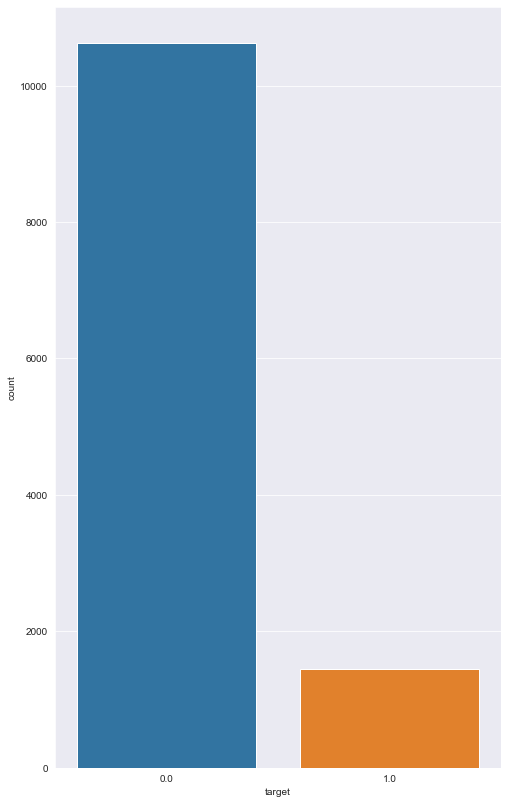

In [ ]:
#visualing the data set to see the balance
sns.countplot(x = "target", data = train_df)

In [ ]:
#subsetting the dataset into majority and minority
majority_class = train_df[train_df["target"] == 0]
minority_class = train_df[train_df["target"] == 1]

print(majority_class.shape)
print(minority_class.shape)

(10624, 602)
(1455, 602)


In [ ]:
from sklearn.utils import resample

In [ ]:
#upsampling minority class using the resampling technique

minority_class_upsampled = resample(minority_class,
                                   replace = True,
                                   n_samples =10624,
                                   random_state = 56)

train_df_upsampled = pd.concat([minority_class_upsampled, majority_class])

In [ ]:
#Boom!!! Dataset BALANCED!!!
train_df_upsampled["target"].value_counts()

0.0    10624
1.0    10624
Name: target, dtype: int64

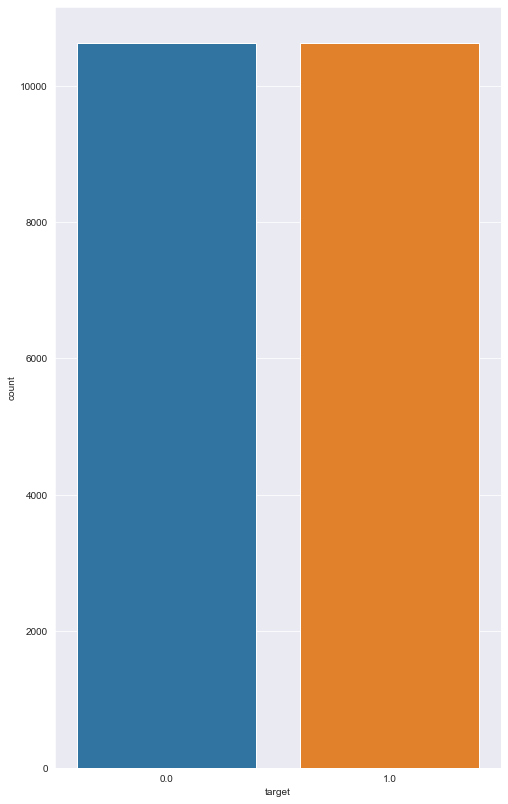

In [ ]:
#Boom!!! Dataset BALANCED!!!
sns.countplot(x = "target", data = train_df_upsampled)

In [ ]:
#checking the shape of the balanced dataset........
train_df_upsampled.shape

##The size of the data set has increased due to balancing

(21248, 602)

### Feature Importance and Selection

In [ ]:
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df_upsampled.head()

,ID,Policy Start Date,Policy End Date,Age,First Transaction Date,No_Pol,target,Policy Duration,Policy_Start_Date_Year,Policy_Start_Date_Month,...,State_Warri-North,State_Warri-South,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve
4088,ID_C7UE65D,1266105600000000000,1297555200000000000,56,1266105600000000000,1,1.0,364,2010,2,...,0,0,1,0,0,0,0,0,0,0
3424,ID_A3VQ250,1275004800000000000,1306454400000000000,33,1275004800000000000,1,1.0,364,2010,5,...,0,0,1,0,0,0,0,0,0,0
10052,ID_U2O2G9M,1288483200000000000,1319932800000000000,39,1288483200000000000,1,1.0,364,2010,10,...,0,0,1,0,0,0,0,0,0,0
11983,ID_ZPQDZ6O,1264636800000000000,1296086400000000000,33,1264636800000000000,1,1.0,364,2010,1,...,0,0,1,0,0,0,0,0,0,0
10416,ID_V7BJW15,1266624000000000000,1297814400000000000,64,1266624000000000000,1,1.0,361,2010,2,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
train_df.dtypes

ID                              object
Policy Start Date                int64
Policy End Date                  int64
Age                              int32
First Transaction Date           int64
                                 ...  
ProductName_CarFlex              uint8
ProductName_CarSafe              uint8
ProductName_Customized Motor     uint8
ProductName_Motor Cycle          uint8
ProductName_Muuve                uint8
Length: 602, dtype: object

In [ ]:
train_df_upsampled.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in train_df_upsampled.columns]

In [ ]:
train_df_upsampled = train_df_upsampled.loc[:,~train_df_upsampled.columns.duplicated()]

In [ ]:
features = train_df_upsampled.columns.difference(['ID', 'target'])

In [ ]:
X = train_df_upsampled[features]
Y = train_df_upsampled["target"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=12)

In [ ]:
X_train

,Age,Age_Binned__23_0__33_0_,Age_Binned__33_0__42_0_,Age_Binned__42_0__52_0_,Age_Binned__52_0__62_0_,Age_Binned__62_0__72_0_,Car_Category_CAMRY_CAR_HIRE,Car_Category_JEEP,Car_Category_Mini_Bus,Car_Category_Mini_Van,...,Subject_Car_Make_Skoda,Subject_Car_Make_Subaru,Subject_Car_Make_Suzuki,Subject_Car_Make_TOYOTA,Subject_Car_Make_Tata,Subject_Car_Make_Volkswagen,Subject_Car_Make_Volvo,Subject_Car_Make_Wrangler_Jeep,Subject_Car_Make_Yamaha,Subject_Car_Make_ZOYTE
8251,38,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
172,43,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10987,35,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10625,45,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7613,35,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,30,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9431,29,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10327,40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5168,50,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test

,Age,Age_Binned__23_0__33_0_,Age_Binned__33_0__42_0_,Age_Binned__42_0__52_0_,Age_Binned__52_0__62_0_,Age_Binned__62_0__72_0_,Car_Category_CAMRY_CAR_HIRE,Car_Category_JEEP,Car_Category_Mini_Bus,Car_Category_Mini_Van,...,Subject_Car_Make_Skoda,Subject_Car_Make_Subaru,Subject_Car_Make_Suzuki,Subject_Car_Make_TOYOTA,Subject_Car_Make_Tata,Subject_Car_Make_Volkswagen,Subject_Car_Make_Volvo,Subject_Car_Make_Wrangler_Jeep,Subject_Car_Make_Yamaha,Subject_Car_Make_ZOYTE
11421,42,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,40,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4356,42,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10319,36,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2544,42,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,66,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10629,31,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,53,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5826,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create a validation set 

X_train,X_val,y_train,y_val = train_test_split(train_df_upsampled[features],train_df_upsampled["target"],test_size=0.3)

In [ ]:
# create dataset for lightgbm

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

In [ ]:
# training the lightgbm model
lgb_params = {
    'task': 'train',
    'boosting_type': 'goss',
    'objective': 'binary',
    'metric':'binary_logloss',
    'metric': {'l2', 'auc'},
    'num_leaves': 50,
    'learning_rate': 0.2,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbose': None,
    'num_iteration':1000,
    'num_threads':5,
    'max_depth':10,
    'min_data_in_leaf':100,
    'alpha':0.5}

In [ ]:
model = lgb.train(lgb_params,lgb_train,num_boost_round=10,valid_sets=lgb_eval,early_stopping_rounds=10)

[LightGBM] [Info] Number of positive: 7422, number of negative: 7451
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 14873, number of used features: 87
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499025 -> initscore=-0.003900
[LightGBM] [Info] Start training from score -0.003900
[1]	valid_0's auc: 0.791044	valid_0's l2: 0.223757
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.8102	valid_0's l2: 0.205694
[3]	valid_0's auc: 0.818336	valid_0's l2: 0.192841
[4]	valid_0's auc: 0.828581	valid_0's l2: 0.182638
[5]	valid_0's auc: 0.835553	valid_0's l2: 0.175522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's auc: 0.83

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's auc: 0.876821	valid_0's l2: 0.138909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's auc: 0.877279	valid_0's l2: 0.13865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's auc: 0.878476	valid_0's l2: 0.138066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's auc: 0.878916	valid_0's l2: 0.1378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's auc: 0.879184	valid_0's l2: 0.13762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's auc: 0.879199	valid_0's l2: 0.137558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's auc: 0.880099	valid_0's l2: 0.137128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's auc: 0.880194	valid_0's l

[150]	valid_0's auc: 0.902076	valid_0's l2: 0.120285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[151]	valid_0's auc: 0.902264	valid_0's l2: 0.11998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[152]	valid_0's auc: 0.902087	valid_0's l2: 0.119841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[153]	valid_0's auc: 0.902402	valid_0's l2: 0.119626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[154]	valid_0's auc: 0.902523	valid_0's l2: 0.119536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	valid_0's auc: 0.902509	valid_0's l2: 0.119494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	valid_0's auc: 0.902454	valid_0's l2: 0.119458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[157]	valid_0's auc: 0.902506	valid_0's l2: 0.11938
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[231]	valid_0's auc: 0.912306	valid_0's l2: 0.110286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[232]	valid_0's auc: 0.912782	valid_0's l2: 0.110012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[233]	valid_0's auc: 0.912803	valid_0's l2: 0.109845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[234]	valid_0's auc: 0.913067	valid_0's l2: 0.109677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[235]	valid_0's auc: 0.91356	valid_0's l2: 0.109287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[236]	valid_0's auc: 0.913567	valid_0's l2: 0.109199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[237]	valid_0's auc: 0.91403	valid_0's l2: 0.108977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[238]	valid_0's auc: 0.913962	v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[310]	valid_0's auc: 0.92092	valid_0's l2: 0.101286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[311]	valid_0's auc: 0.92072	valid_0's l2: 0.10143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[312]	valid_0's auc: 0.920943	valid_0's l2: 0.101278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[313]	valid_0's auc: 0.920848	valid_0's l2: 0.101311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[314]	valid_0's auc: 0.920736	valid_0's l2: 0.101404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[315]	valid_0's auc: 0.920957	valid_0's l2: 0.101297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[316]	valid_0's auc: 0.92092	valid_0's l2: 0.101396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[317]	valid_0's auc: 0.920995	val

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[391]	valid_0's auc: 0.925743	valid_0's l2: 0.0955135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[392]	valid_0's auc: 0.925839	valid_0's l2: 0.0954066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[393]	valid_0's auc: 0.926064	valid_0's l2: 0.0952916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[394]	valid_0's auc: 0.926012	valid_0's l2: 0.0953149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[395]	valid_0's auc: 0.926269	valid_0's l2: 0.0951299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[396]	valid_0's auc: 0.926229	valid_0's l2: 0.0952062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[397]	valid_0's auc: 0.926188	valid_0's l2: 0.0952028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[398]	valid_0's auc: 0

In [ ]:
print(f'F1 score on the X_test is: {f1_score(Y_test, Y_pred_lgb)*100}')

### Light Gradient Boosting Machine Classifier

In [ ]:
model_lgb = lgb.LGBMClassifier(n_estimators=1000)
model_lgb.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# predict the results
Y_pred_lgb=model_lgb.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_pred_lgb, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_lgb)*100))

LightGBM Model accuracy score: 94.2018


In [ ]:
#Compare train and test set accuracy
Y_pred_train = model_lgb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)*100))

Training-set accuracy score: 96.7558


In [ ]:
#Check for Overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lgb.score(X_train, Y_train)*100))

print('Test set score: {:.4f}'.format(model_lgb.score(X_test, Y_test)*100))

Training set score: 96.7558
Test set score: 94.2018


In [ ]:
#Confusion-matrix
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_lgb)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2358  284]
 [  24 2646]]

True Positives(TP) =  2358

True Negatives(TN) =  2646

False Positives(FP) =  284

False Negatives(FN) =  24


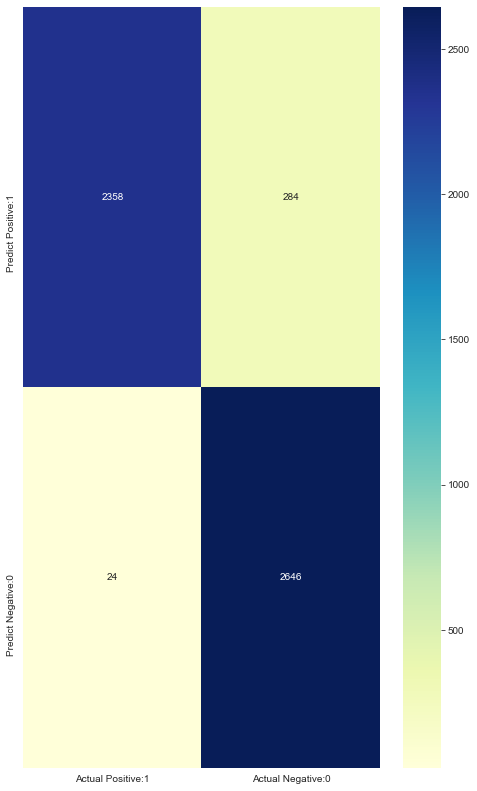

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Classification Metrices

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_lgb))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      2642
         1.0       0.90      0.99      0.94      2670

    accuracy                           0.94      5312
   macro avg       0.95      0.94      0.94      5312
weighted avg       0.95      0.94      0.94      5312



In [ ]:
# Check the f1 score of the model
print(f'F1 score on the X_test is: {f1_score(Y_test, Y_pred_lgb)*100}')

F1 score on the X_test is: 94.49999999999999


### XGBClassifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model_xgb = xgb.XGBClassifier(n_estimators=1000, random_state=1)
model_xgb.fit(X_train, Y_train)

[23:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
# predict the results
Y_pred_xgb=model_xgb.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_pred_xgb, Y_test)
print('xgboost Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_xgb)*100))

xgboost Model accuracy score: 93.7877


In [ ]:
#Compare train and test set accuracy
Y_pred_train = model_xgb.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)*100))

Training-set accuracy score: 96.8185


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2642
         1.0       0.90      0.99      0.94      2670

    accuracy                           0.94      5312
   macro avg       0.94      0.94      0.94      5312
weighted avg       0.94      0.94      0.94      5312



In [ ]:
# Check the f1 score of the model
print(f'F1 score on the X_test is: {f1_score(Y_test, Y_pred_xgb)*100}')

F1 score on the X_test is: 94.13020277481323
